In [3]:
import numpy as np
import cProfile
import numpy.typing as npt

def gosper_glider_gun():
    grid = np.zeros((50, 50), dtype=np.int8)
    grid[5, 1] = 1
    grid[5, 2] = 1
    grid[6, 1] = 1
    grid[6, 2] = 1

    grid[5, 11] = 1
    grid[5, 12] = 1
    grid[6, 11] = 1
    grid[6, 12] = 1
    grid[7, 11] = 1
    grid[7, 12] = 1

    grid[4, 13] = 1
    grid[3, 14] = 1
    grid[3, 15] = 1
    grid[2, 15] = 1
    grid[2, 14] = 1
    grid[1, 14] = 1

    grid[4, 17] = 1
    grid[3, 17] = 1
    grid[2, 17] = 1
    grid[4, 18] = 1
    grid[3, 18] = 1
    grid[2, 18] = 1
    grid[1, 18] = 1
    grid[5, 19] = 1
    grid[1, 19] = 1

    grid[6, 21] = 1
    grid[5, 21] = 1
    grid[4, 21] = 1
    grid[6, 22] = 1
    grid[5, 22] = 1
    grid[4, 22] = 1
    grid[3, 22] = 1
    grid[2, 22] = 1
    grid[3, 23] = 1
    grid[2, 23] = 1

    grid[7, 25] = 1
    grid[6, 25] = 1
    grid[5, 25] = 1
    grid[7, 26] = 1
    grid[6, 26] = 1
    grid[5, 26] = 1

    return grid


# put the grid in a torus
def torus(grid) -> np.ndarray:
    grid: np.ndarray = np.pad(grid, 1, 'wrap')
    return grid



# pack the grid into an array of single bits
def pack(grid):
    grid = grid.flatten()
    grid = np.packbits(grid)
    return grid

In [4]:
import alchemy as alch



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

         15656154 function calls (15650154 primitive calls) in 79.932 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   913832    0.982    0.000   41.057    0.000 <__array_function__ internals>:177(all)
     1000    0.002    0.000    2.983    0.003 <__array_function__ internals>:177(argwhere)
     2000    0.003    0.000    0.049    0.000 <__array_function__ internals>:177(moveaxis)
     1000    0.001    0.000    0.004    0.000 <__array_function__ internals>:177(ndim)
     1000    0.001    0.000    2.942    0.003 <__array_function__ internals>:177(nonzero)
     1000    0.002    0.000    0.027    0.000 <__array_function__ internals>:177(prod)
   914832    0.599    0.000   10.396    0.000 <__array_function__ internals>:177(sum)
     1000    0.002    0.000    0.027    0.000 <__array_function__ internals>:177(transpose)
     1000    0.003    0.000    1.337    0.001 <__array_function__ internals>:177(unique)
        1    0.000  

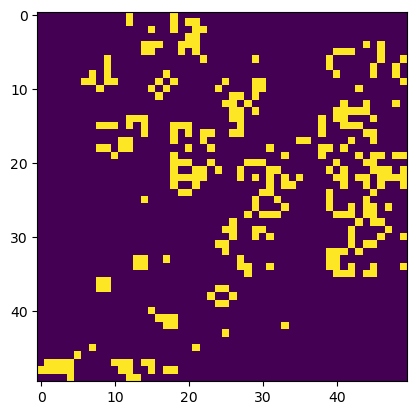

In [13]:

grid = np.zeros((1000, 1000), dtype=np.int8)
ggg = alch.Cell(gosper_glider_gun())
grid = torus(grid)
ggg.apply(grid, 0, 0)
biome = alch.Biome(grid)
cProfile.run('biome.run(1000)')
import matplotlib.pyplot as plt
plt.imshow(biome.grid[:50, :50])
plt.show()


In [16]:
# create a window to monitor the grid with pyglet
import pyglet
from pyglet.window import key
from pyglet.window import mouse
from pyglet.gl import *

window = pyglet.window.Window(width=500, height=500, resizable=True)
window.set_caption('Game of Life')

# create a texture to display the grid
texture = pyglet.image.Texture.create(500, 500, rectangle=True)

# create a batch to draw the grid
batch = pyglet.graphics.Batch()
# create a vertex list to draw the grid
vertex_list = batch.add(4, pyglet.gl.GL_QUADS, None,
                        ('v2i', (0, 0, 500, 0, 500, 500, 0, 500)),
                        ('t2f', (0, 0, 1, 0, 1, 1, 0, 1)))

# create a label to display the generation
label = pyglet.text.Label('Generation: 0',
                            font_name='Times New Roman',
                            font_size=36,
                            x=window.width//2, y=window.height//2,
                            anchor_x='center', anchor_y='center')

# create a label to display the fps
fps_display = pyglet.clock.ClockDisplay()

# display the grid
def display_grid():
    texture.blit_into(batch, 0, 0, 0)
    batch.draw()
    label.draw()
    fps_display.draw()

# update the grid
def update_grid(dt):
    biome.run(1)
    texture.blit_into(biome.grid, 0, 0, 0)
    label.text = f'Generation: {biome.generation}'
    label.x = window.width//2
    label.y = window.height//2

# update the grid every 1/60th of a second
pyglet.clock.schedule_interval(update_grid, 1/60)

# display the grid
@window.event
def on_draw():
    window.clear()
    display_grid()

# resize the window
@window.event
def on_resize(width, height):
    glViewport(0, 0, width, height)
    glMatrixMode(gl.GL_PROJECTION)
    glLoadIdentity()
    glOrtho(0, width, 0, height, -1, 1)
    glMatrixMode(gl.GL_MODELVIEW)
    return pyglet.event.EVENT_HANDLED

pyglet.app.run()



ContextException: Unable to share contexts.

: 